NSF Research Awards Abstracts
This dataset comprises several paper abstracts, one per file,  that were furnished by the NSF (National Science Foundation). A sample abstract is shown at the end.
Your task is developing an unsupervised model which classifies abstracts into a topic (discover them!). Indeed, your goal is to group abstracts based on their semantic similarity.

You can get a sample of abstracts here. Be creative and state clearly your approach. Although we don’t expect accurate results but a good pipeline of your work.
It is affordable to create a notebook, like Jupyter (if you use python) or a Rmarkdown report (in case you use R) and make it available for us, i.e. github.
 
Hint to success in your quest: Develop and stay clear of the data science process you'll perform over the dataset and highlight important aspects you might consider affordable to discuss over.
 
Aside notes: All fields in every abstract file wouldn’t be needed. Be keen.
 
Good luck and have fun.
 
 
Abstract sample:
==================================================================
Title       : CAREER: Markov Chain Monte Carlo Methods
Type: Award
NSF Org     : CCR
Latest
Amendment
Date        : May 5, 2003
File        : a0237834
 
Award Number: 0237834
Award Instr.: Continuing grant
Prgm Manager: Ding-Zhu Du
          CCR  DIV OF COMPUTER-COMMUNICATIONS RESEARCH
          CSE  DIRECT FOR COMPUTER & INFO SCIE & ENGINR
Start Date  : August 1,  2003
Expires     : May 31,  2008 (Estimated)
Expected
Total Amt.  : $400000             (Estimated)
Investigator: Eric Vigoda vigoda@cs.uchicago.edu  (Principal Investigator current)
Sponsor     : University of Chicago
          5801 South Ellis Avenue
          Chicago, IL  606371404    773/702-8602
 
NSF Program : 2860      THEORY OF COMPUTING
Fld Applictn:
Program Ref : 1045,1187,9216,HPCC,
Abstract    :
 
     Markov chain Monte Carlo (MCMC) methods are an important algorithmic
     device in a variety of fields.  This project studies techniques for rigorous
     analysis of the convergence properties of Markov chains.   The emphasis is on
     refining probabilistic, analytic and combinatorial tools (such as coupling,
     log-Sobolev, and canonical paths) to improve existing algorithms and develop
     efficient algorithms for important open problems.
 
     Problems arising in
     computer science, discrete mathematics, and physics are of particular interest,
     e.g., generating random colorings and independent sets of bounded-degree
     graphs, approximating the permanent, estimating the volume of a convex body,
     and sampling contingency tables.  The project also studies inherent connections
     between phase transitions in statistical physics models and convergence
     properties of associated Markov chains.
 
     The investigator is developing a
     new graduate course on MCMC methods.
==================================================================


In [1]:
import os
import numpy as np
import xml.etree.ElementTree as ET
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
lets load all our files' paths
xmlfiles = ['./abstracts/{}'.format(i) for i in os.listdir('./abstracts')]

In [4]:
xmlfiles = xmlfiles[:-1]

In [5]:
#now lets load all our abstract text and associate the text with the file name
#since i only want to classify the abstracts, only the abstract text is useful for me and im ignoring all the other fields
text = {}
corrupted_files = []
for data in xmlfiles:
    try:
        temp = ET.parse(data)
        root = temp.getroot()
        for x in root.iter():
            if x.tag == 'AbstractNarration':
                text[data.split('/')[2]] = x.text
    except:
        corrupted_files.append(data)
        continue

In [6]:
#THE FOLLOWING FILES WERE EITHER CORRUPTED OR WERE NOT IN .XML CORRECT FORMATTING
for item in corrupted_files:
    print(item)

./abstracts/2012041.xml
./abstracts/2012333.xml
./abstracts/2013392.xml
./abstracts/2022805.xml
./abstracts/2026574.xml
./abstracts/2029883.xml
./abstracts/2037383.xml


In [7]:
data

'./abstracts/2055781.xml'

In [8]:
#converting our dict into a pandas dataframe and manipulationg our dataframe to help us visualize our dataset better
df = pd.DataFrame.from_dict(text, orient='index')

In [9]:
df.reset_index(inplace=True)

In [10]:
df.rename(columns={'index':'name_of_file',0:'text'},inplace=True)

In [11]:
np.where(df['text'].isnull())[0]#checking the index of xml that have no texts

array([  282,   380,   382,   383,   384,   567,   619,   698,   850,
         870,   894,  1053,  1231,  1645,  1859,  1958,  2611,  2778,
        3210,  3239,  3282,  3361,  4113,  4738,  4791,  4818,  4954,
        5158,  5365,  5525,  5550,  5766,  6398,  6774,  6805,  6849,
        7442,  7798,  7803,  7804,  7952,  8197,  8389,  8543,  8886,
        8899,  9053,  9089,  9157,  9222,  9273,  9291,  9344,  9348,
        9378,  9393,  9482,  9588,  9625,  9633,  9636,  9930, 10701,
       10882, 11196, 11301], dtype=int64)

In [12]:
newdf = df[df['text'].notna()]#creating a new dataframe without the textless xmls'

In [13]:
len(newdf['text'])

11441

In [14]:
#last check if we really only deleted files with no text
for x in np.where(df['text'].isnull())[0]:
    print(df.iloc[x])

name_of_file    2001029.xml
text                   None
Name: 282, dtype: object
name_of_file    2001271.xml
text                   None
Name: 380, dtype: object
name_of_file    2001273.xml
text                   None
Name: 382, dtype: object
name_of_file    2001275.xml
text                   None
Name: 383, dtype: object
name_of_file    2001276.xml
text                   None
Name: 384, dtype: object
name_of_file    2001846.xml
text                   None
Name: 567, dtype: object
name_of_file    2002070.xml
text                   None
Name: 619, dtype: object
name_of_file    2002401.xml
text                   None
Name: 698, dtype: object
name_of_file    2002833.xml
text                   None
Name: 850, dtype: object
name_of_file    2002888.xml
text                   None
Name: 870, dtype: object
name_of_file    2002944.xml
text                   None
Name: 894, dtype: object
name_of_file    2003608.xml
text                   None
Name: 1053, dtype: object
name_of_file    2004263.xml

In [15]:
#ok, our dataset is now ready to be transformed
#i will use scikitlearn's K means algorithm to cluster the texts by similarity
#i will also use nltk and TFIDF to parse the text into data that our k means clustering model can be fed with

In [16]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_files
import re
from mpl_toolkits import mplot3d
from datetime import datetime

In [17]:
newdf['text'] = newdf['text'].apply(lambda x: x.lower()) #applying .lower() to all abstract texts
newdf['text'].head()#checking if it worked

0    head and heart development are closely intertw...
1    the national academy of engineering identified...
2    this award provides three years of funding to ...
3    this collaborative research project, involving...
4    research initiation awards provide support for...
Name: text, dtype: object

In [18]:
#removing all non-letter characters
newdf['text'] = newdf['text'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x)) 

In [19]:
#now lets use nltk's stemmer to stem all words
stemmer = nltk.stem.RSLPStemmer()
newdf['text'] = newdf['text'].apply(lambda x: stemmer.stem(x))

In [20]:
#using nltk's stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
#using TF-IDF as the method of detecting similarities between texts and creating a bag of words with
#the unique words in the texts
vec = TfidfVectorizer(stop_words=stopwords)

In [22]:
#checking our bag of words
vec.fit(newdf.text.values)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [23]:
features = vec.transform(newdf.text.values)

In [24]:
#checking our now model-ready bag of words
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#now its time to choose a model and number of clusters
#loop to help visualize the accuracy relationship of the ideal number of clusters using the silhouette
#score technique
time = datetime.now()

for cluster in range(2,30):
    cls = MiniBatchKMeans(n_clusters=cluster)
    cls.fit(features)
    print('for ' + str(cluster) + ' clusters, we got a silhouette_score of ' + str(silhouette_score(features,cls.labels_)))
print('total time elapsed: '+ str(datetime.now()-time))

for 2 clusters, we got a silhouette_score of 0.0020579294160329607
for 3 clusters, we got a silhouette_score of 0.0041366862688337475
for 4 clusters, we got a silhouette_score of 0.004978596015670368
for 5 clusters, we got a silhouette_score of 0.00467672586874499
for 6 clusters, we got a silhouette_score of 0.006400688374954857
for 7 clusters, we got a silhouette_score of 0.007050697018710999
for 8 clusters, we got a silhouette_score of 0.00042482511971450815
for 9 clusters, we got a silhouette_score of 0.007442745093756562
for 10 clusters, we got a silhouette_score of 0.008055101098283326
for 11 clusters, we got a silhouette_score of 0.0014333820849978887
for 12 clusters, we got a silhouette_score of 0.002157932469063302
for 13 clusters, we got a silhouette_score of 0.00403557622088284
for 14 clusters, we got a silhouette_score of 0.0009544399755195771
for 15 clusters, we got a silhouette_score of 0.0022846355048450236
for 16 clusters, we got a silhouette_score of 0.00126765374010330

In [26]:
#same loop but now measuring the MiniBatchKMeans algorithm
time = datetime.now()
numbcluster = []
score = []

for cluster in range(2,40):
    numbcluster.append(cluster)
    cls = MiniBatchKMeans(n_clusters=cluster)
    cls.fit(features)
    print('for ' + str(cluster) + ' clusters, we got a silhouette_score of ' + str(silhouette_score(features,cls.labels_)))
    score.append(silhouette_score(features,cls.labels_))
print('total time elapsed: '+ str(datetime.now()-time))

for 2 clusters, we got a silhouette_score of 0.003166784156309674
for 3 clusters, we got a silhouette_score of 0.004670999857930729
for 4 clusters, we got a silhouette_score of 0.00485179212867512
for 5 clusters, we got a silhouette_score of 0.0047186125315395976
for 6 clusters, we got a silhouette_score of 0.007443814596047949
for 7 clusters, we got a silhouette_score of 0.005518467717542013
for 8 clusters, we got a silhouette_score of 0.00781978474268408
for 9 clusters, we got a silhouette_score of 0.0072033522434224095
for 10 clusters, we got a silhouette_score of 0.006346210993222641
for 11 clusters, we got a silhouette_score of 0.00746006230382921
for 12 clusters, we got a silhouette_score of -0.002761890631258864
for 13 clusters, we got a silhouette_score of 0.0009263273193725058
for 14 clusters, we got a silhouette_score of 0.006422758645631553
for 15 clusters, we got a silhouette_score of 0.004822429086108689
for 16 clusters, we got a silhouette_score of 0.0007353091409679944
f

In [40]:
#from now on I will move forward with the MBKmeans algorithm
#due to its significantly faster processing which allowed me to test more hyphotesis while mantaining similar accuracy overall
#even though 'KMeans' yielded better scores with higher clusters, I still choose to go on with 'MiniBatchKMeans'

In [53]:
import seaborn as sns
sns.set(style="darkgrid")
sns.__version__

'0.10.1'

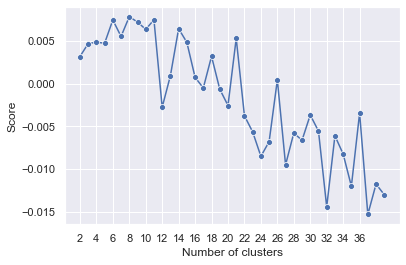

In [68]:
#plotting number of clusters x score to help us visualize better how the score behaves when the number of cluster varies
fig, ax = plt.subplots()
sns.lineplot(x=numbcluster,y=score,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
ax.set_xticks(range(2,len(numbcluster),2))
plt.show()


In [28]:
df = pd.DataFrame(score,index=numbcluster)

In [29]:
df = df.transpose()

In [30]:
df.idxmax(axis=1)[0]

8

In [31]:
#now we are selecting the number of clusters which yielded the higher accuracy
cls = MiniBatchKMeans(n_clusters = df.idxmax(axis=1)[0], random_state = 1).fit(features)

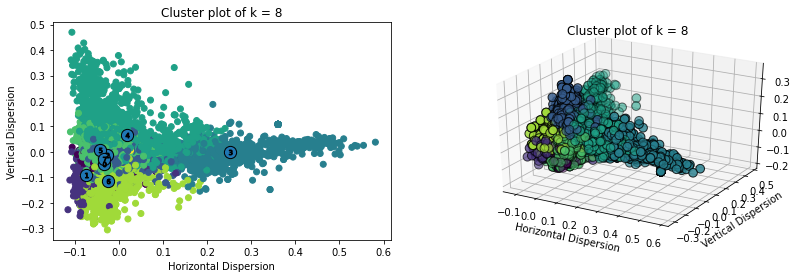

In [32]:
#now plotting the clusters for us to see it better
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1,2,1)#2D plot
pca = PCA(n_components=2,random_state = 0)#converting the features to 2D
reduced_features=pca.fit_transform(features.toarray())#converting the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))#plotting the 2D graph
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')
for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=25, edgecolor='k')
plt.title('Cluster plot of k = {}'.format(len(cls.counts_)))
plt.xlabel('Horizontal Dispersion')
plt.ylabel('Vertical Dispersion')
ax = fig.add_subplot(1,2,2,projection='3d')#3D plot
plt.title('Cluster plot of k = {}'.format(len(cls.counts_)))
plt.xlabel('Horizontal Dispersion')
plt.ylabel('Vertical Dispersion')
pca = PCA(n_components=3, random_state=0)#converting the cluster centers to 3D
reduced_features = pca.fit_transform(features.toarray())
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=75, edgecolor='k', c=cls.predict(features))
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
fig.savefig('IMG')
plt.show()


In [33]:
#now getting a random abstract from the internet and checking on which clusters it better fits on
#according to our model
teste = r'Bounds and Asymptotic Dynamics for Nonlinear Evolution Equations NSF 09/01/2019 06/30/2021 73026.00 73026 Standard Grant 03040000 MPS Direct For Mathematical & Physical Scien DMS Division Of Mathematical Sciences Victor Roytburd vroytbur@nsf.gov 7032928584 Many physical, engineering, and biological phenomena are described by mathematical models with a large number of strongly-interacting particles. The range of these phenomena includes such diverse examples as complex and compressible fluids (combustion, aerospace engineering, and meteorology), nonlocal reaction-diffusion processes (nuclear physics, population biology, and genetics), and kinetic theory (plasma physics, swarm dynamics, and astrophysics). This project focuses on novel approaches to determining two fundamental characteristics of solutions to equations modeling large numbers of strongly interacting particles: their regularity and asymptotic behavior. The regularity of such problems establishes that the models are well-behaved, which often means the equations remain numerically tractable in computer simulations. The asymptotic theory seeks to find simplified limiting behavior for equations, in which many complex interactions average out and have a residual effect that governs the behavior of the system. Information about the limiting behavior is instrumental for applications such as medical imaging or materials science. For many important phenomena that demonstrate complex, nonlinear behavior, the application of known methods for analysis and control is greatly limited and not always possible. The aim of this project is to investigate three new techniques that partly overcome the difficulties caused by nonlinearity. The project will also provide training and research opportunities for both graduate and undergraduate students. <br/><br/>The principal investigator will use techniques of nonlinear analysis, viscosity theory, and probability to establish bounds and asymptotic dynamics for the three major parts of the project. The first part focuses on exploring thermally enhanced dissipation for hydrodynamic equations where the viscosity grows with local temperature. From kinetic considerations and empirical observations, the kinematic viscosity of a compressible fluid flow increases with the local temperature and the local temperature is produced by friction. The intuition is that, in such models, regions of high turbulence self-regularize by producing hot spots which boost the viscosity exactly where it is needed to prevent the development of singularities. Prior work has identified this effect in two model problems (along with corresponding bounds). One of the main goals of the project is to push these types of estimates to physical models of compressible thermal fluids such as the Navier-Stokes-Fourier system, the equations of magneto-hydrodynamics, and the Poisson-Nernst-Planck-Fourier system for electrokinetic complex fluids. Enhanced thermal dissipation is a truly novel source of regularization compared to other known energy-based methods and lends itself naturally to dynamic weighted Sobolev estimates and entropy methods. The second part focuses on developing methods to extract asymptotic behavior from strongly nonlocal heterogeneous reaction-diffusion equations. There is a growing interest in extracting simpler macroscopic dynamics (often taking the form of geometric equations) from certain scaling limits of more complicated models. The nonlocal operators in these models present unique challenges in determining their residual impact on the (sometimes discontinuous) homogenized equation. The investigator plans to implement the techniques of viscosity theory to pursue homogenization phenomena for nonlocal periodic Fisher-KPP and bistable (Allen-Cahn) equations. The third part focuses on the regularity theory for kinetic equations (i.e., Landau and Boltzmann). Most regularity results for these equations rely on the assumption of having the lower bound on the density (as this often yields a minimum dissipation in the velocity variables). The investigator will explore the emergence of such lower bounds through probabilistic techniques, writing the kinetic equation as an approximate Fokker-Planck equation for a certain stochastic process.<br/><br/>This award reflects NSFs statutory mission and has been deemed worthy of support through evaluation using the Foundations intellectual merit and broader impacts review criteria. 01/06/2020 01/06/2020 Grant 47.049 1 4900 4900 2012333 Andrei Tarfulea Andrei Tarfulea tarfulea@lsu.edu 2255782925 000679333 01/06/2020 Principal Investigator Louisiana State University Baton Rouge EAST BATON ROUGE 708032701 2255782760 202 Himes Hall United States Louisiana LA 06 LA06 075050765 LOUISIANA STATE UNIVERSITY 940050792'

In [34]:
teste = re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', teste)

In [35]:
teste = stemmer.stem(teste)

In [36]:
teste = [teste]

In [37]:
#here we can see the model assigned the abstract to a certain cluster
cls.predict(vec.transform(teste))

array([4])